In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

2024-03-25 17:46:02.540901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-25 17:46:02.540958: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
file_path = 'dataset2'

In [3]:
name_class = os.listdir(file_path)
name_class

['glioma', 'notumor', 'meningioma', 'pituitary']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['dataset2/glioma/Tr-gl_1113.jpg',
 'dataset2/glioma/Tr-gl_0178.jpg',
 'dataset2/glioma/Tr-gl_1286.jpg',
 'dataset2/glioma/Te-gl_0175.jpg',
 'dataset2/glioma/Tr-gl_0989.jpg',
 'dataset2/glioma/Tr-gl_0851.jpg',
 'dataset2/glioma/Tr-gl_0104.jpg',
 'dataset2/glioma/Tr-gl_0057.jpg',
 'dataset2/glioma/Tr-gl_0172.jpg',
 'dataset2/glioma/Tr-gl_1138.jpg',
 'dataset2/glioma/Tr-gl_0852.jpg',
 'dataset2/glioma/Tr-gl_0459.jpg',
 'dataset2/glioma/Tr-gl_0779.jpg',
 'dataset2/glioma/Tr-gl_0020.jpg',
 'dataset2/glioma/Te-gl_0106.jpg',
 'dataset2/glioma/Tr-gl_0883.jpg',
 'dataset2/glioma/Te-gl_0156.jpg',
 'dataset2/glioma/Tr-gl_0809.jpg',
 'dataset2/glioma/Tr-gl_1308.jpg',
 'dataset2/glioma/Tr-gl_1257.jpg',
 'dataset2/glioma/Tr-gl_0443.jpg',
 'dataset2/glioma/Te-gl_0143.jpg',
 'dataset2/glioma/Tr-gl_0138.jpg',
 'dataset2/glioma/Tr-gl_0390.jpg',
 'dataset2/glioma/Tr-gl_0285.jpg',
 'dataset2/glioma/Tr-gl_1241.jpg',
 'dataset2/glioma/Tr-gl_0161.jpg',
 'dataset2/glioma/Tr-gl_0377.jpg',
 'dataset2/glioma/Te

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',

In [7]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,dataset2/meningioma/Tr-me_0620.jpg,meningioma
1,dataset2/pituitary/Tr-pi_0335.jpg,pituitary
2,dataset2/pituitary/Tr-pi_0689.jpg,pituitary
3,dataset2/glioma/Tr-gl_0477.jpg,glioma
4,dataset2/notumor/Tr-no_0058.jpg,notumor


In [8]:
#balancing

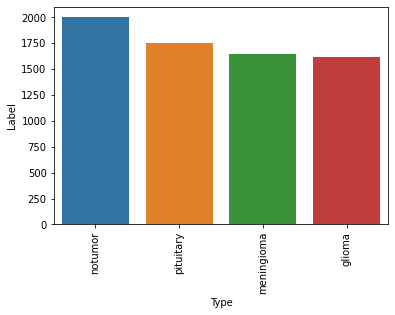

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [10]:
#balance by deleting extra images (Augmentor API)
#augmentation 


In [11]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

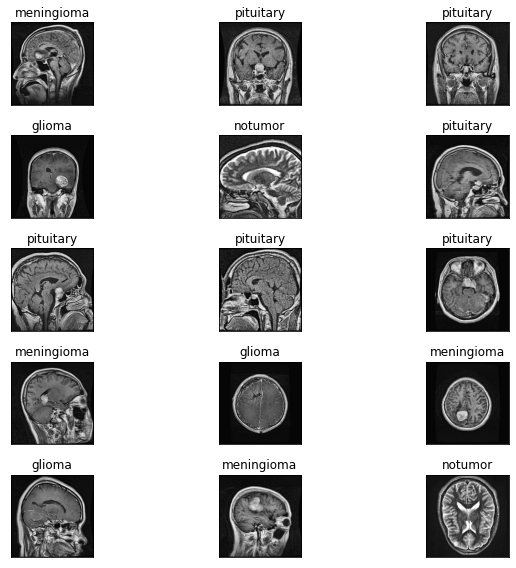

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [13]:
train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [14]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(256,256),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 5267 validated image filenames belonging to 4 classes.
Found 1756 validated image filenames belonging to 4 classes.
Found 1756 validated image filenames belonging to 4 classes.


In [15]:
pretrained_model = ResNet50(
    input_shape=(256,256, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

2024-03-25 17:50:10.211470: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-25 17:50:10.211516: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-25 17:50:10.211547: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (admin1-HP-EliteBook-840-G1): /proc/driver/nvidia/version does not exist
2024-03-25 17:50:10.212282: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=5
)

Epoch 1/5
165/165 [==============================] - 1458s 9s/step - loss: 0.2934 - accuracy: 0.8905 - val_loss: 0.2764 - val_accuracy: 0.8912
Epoch 2/5
165/165 [==============================] - 1443s 9s/step - loss: 0.2522 - accuracy: 0.9024 - val_loss: 0.2070 - val_accuracy: 0.9191
Epoch 3/5
165/165 [==============================] - 1445s 9s/step - loss: 0.2238 - accuracy: 0.9134 - val_loss: 0.2062 - val_accuracy: 0.9191
Epoch 4/5
165/165 [==============================] - 1437s 9s/step - loss: 0.2081 - accuracy: 0.9170 - val_loss: 0.1810 - val_accuracy: 0.9317
Epoch 5/5
165/165 [==============================] - 1433s 9s/step - loss: 0.2038 - accuracy: 0.9248 - val_loss: 0.2045 - val_accuracy: 0.9220


In [21]:
model.save("model_resnet50_brain_cancer_2.h5")  

/home/admin1/anaconda3/envs/agri/lib/python3.7/site-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


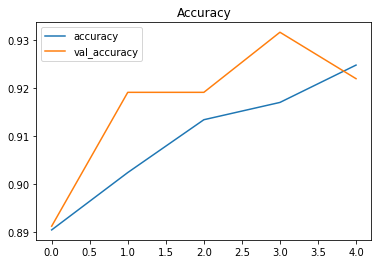

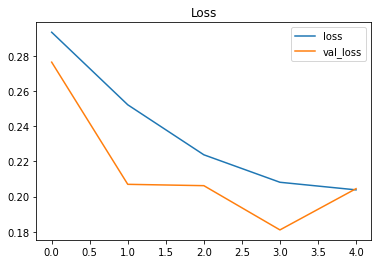

In [22]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [23]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

/home/admin1/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/admin1/.local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


    Test Loss: 0.21013
Test Accuracy: 91.86%


In [24]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [25]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      glioma       0.98      0.83      0.90       437
  meningioma       0.79      0.92      0.85       409
     notumor       0.99      0.96      0.97       482
   pituitary       0.94      0.98      0.96       428

    accuracy                           0.92      1756
   macro avg       0.93      0.92      0.92      1756
weighted avg       0.93      0.92      0.92      1756



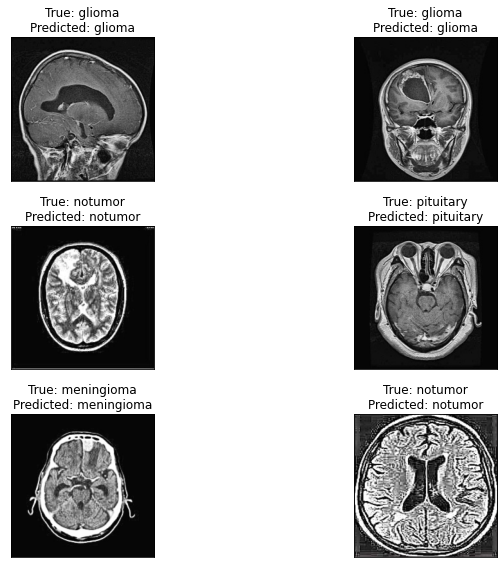

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [27]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'Te-gl_0014.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (256,256))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


[[ 5 93  0  0]]


In [28]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_resnet50_brain_cancer_2.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [42]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from PIL import Image
img_path = 'Tr-me_0010.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)

# Convert the input image to RGB (OpenCV reads images in BGR format)
input_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create an instance of ImageDataGenerator with specified transformations
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Fit the ImageDataGenerator to the input data
datagen.fit(input_image.reshape((1,) + input_image.shape))

# Generate augmented data (only one sample as we have only one input image)
augmented_data = next(datagen.flow(input_image.reshape((1,) + input_image.shape), batch_size=1))

# Convert augmented data to uint8 format (expected by PIL)
augmented_data_uint8 = augmented_data.astype(np.uint8)

# Convert augmented data back to PIL image
output_image = Image.fromarray(augmented_data_uint8[0])

# Save the output image
output_image.save("outputa.png")

img2 = cv2.imread("outputa.png")

img = cv2.resize(img2, (256,256))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_imageNet.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)


[[87 11  0  0]]


In [43]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[87, 11, 0, 0]


In [44]:
print("Largest element is:", max(pp))

Largest element is: 87


In [45]:
index = pp.index(max(pp))

In [46]:
name_class=["glioma","meningioma","notumor","pituitary"]

In [47]:
name_class[index]

'glioma'

In [48]:
import matplotlib.pyplot as plt

In [49]:
plt.imread(img_path)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

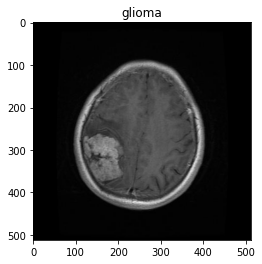

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()